<a href="https://colab.research.google.com/github/Shantanu9326/Breast-Cancer-Wisconsin-Diagnostic-Data-Set/blob/master/Tumor_Cell_State_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


##Part A

###1.1 Data Munging

• Read the training and testing data. Print the number of features in the dataset.

• For the data label, print the total number of 1's and 0's in the training and testing data. Comment on the class
distribution. Is it balanced or unbalanced?

• Print the number of features with missing entries.

• Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values
from observed entries.

• Normalize the training and testing data.

In [0]:
### Importing relevant modules ###

## Data Preprocessing

import numpy as np
import pandas as pd
from sklearn import preprocessing

## Visualisation

import matplotlib.pyplot as plt
%matplotlib inline
#Ignore Warnings

import warnings
warnings.filterwarnings("ignore")

In [0]:
## Read the training and testing data. Print the number of features in the dataset
train = pd.read_csv("/content/drive/My Drive/app/train_wbcd.csv")
test = pd.read_csv("/content/drive/My Drive/app/test_wbcd.csv")

dataset = pd.concat([train,test])
print(dataset)

    Patient_ID Diagnosis      f1     f2      f3      f4       f5       f6  \
0       909410         B  14.020  15.66   89.59   606.5  0.07966  0.05581   
1     84358402         M  20.290  14.34  135.10  1297.0  0.10030  0.13280   
2      8912284         B  12.890  15.70   84.08   516.6  0.07818  0.09580   
3     90317302         B  10.260  12.22   65.75   321.6  0.09996  0.07542   
4       914102         B  13.160  20.54   84.06   538.7  0.07335  0.05275   
5       924342         B   9.333  21.94   59.01   264.0  0.09240  0.05605   
6      8911164         B  11.890  17.36   76.20   435.6  0.12250  0.07210   
7       893548         B  13.050  13.84   82.71   530.6  0.08352  0.03735   
8       867739         M  18.450  21.91  120.20  1075.0  0.09430  0.09709   
9       857374         B  11.940  18.24   75.71   437.6  0.08261  0.04751   
10      853201         M  17.570  15.05  115.00   955.1  0.09847  0.11570   
11      857373         B  13.640  16.34   87.21   571.8  0.07685  0.06059   

In [0]:
# We can see from the dataset all the feature columns starts with "f"
features = dataset.filter(regex='[f]', axis=1)
number_of_examples, number_of_features = features.shape
print(f"The number of features in the dataset are: {number_of_features}")

The number of features in the dataset are: 30


In [0]:
features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,0.06569,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [0]:
X=features
print(X)

        f1     f2      f3      f4       f5       f6        f7        f8  \
0   14.020  15.66   89.59   606.5  0.07966  0.05581  0.020870  0.026520   
1   20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000  0.104300   
2   12.890  15.70   84.08   516.6  0.07818  0.09580  0.111500  0.033900   
3   10.260  12.22   65.75   321.6  0.09996  0.07542  0.019230  0.019680   
4   13.160  20.54   84.06   538.7  0.07335  0.05275  0.018000  0.012560   
5    9.333  21.94   59.01   264.0  0.09240  0.05605  0.039960  0.012820   
6   11.890  17.36   76.20   435.6  0.12250  0.07210  0.059290  0.074040   
7   13.050  13.84   82.71   530.6  0.08352  0.03735  0.004559  0.008829   
8   18.450  21.91  120.20  1075.0  0.09430  0.09709  0.115300  0.068470   
9   11.940  18.24   75.71   437.6  0.08261  0.04751  0.019720  0.013490   
10  17.570  15.05  115.00   955.1  0.09847  0.11570  0.098750  0.079530   
11  13.640  16.34   87.21   571.8  0.07685  0.06059  0.018570  0.017230   
12  13.850  17.21   88.44

In [0]:
y=pd.DataFrame(dataset.iloc[:,1])
print(y)

   Diagnosis
0          B
1          M
2          B
3          B
4          B
5          B
6          B
7          B
8          M
9          B
10         M
11         B
12         B
13         B
14         B
15         B
16         B
17         B
18         B
19         M
20         B
21         B
22         M
23         M
24         B
25         B
26         B
27         M
28         B
29         B
..       ...
90         M
91         M
92         B
93         M
94         M
95         M
96         M
97         B
98         B
99         B
0          B
1          M
2          B
3          B
4          B
5          M
6          B
7          M
8          B
9          M
10         M
11         B
12         B
13         B
14         B
15         B
16         B
17         B
18         B
19         M

[120 rows x 1 columns]


In [0]:
#Encoding Categorical Data (Diagnosis)
#Malignant(M)-1
#Benign(B)-0
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1]


Number of Zeroes in training label: 72
Number of Ones in training label: 48
Diagnosis column in training set is unbalanced


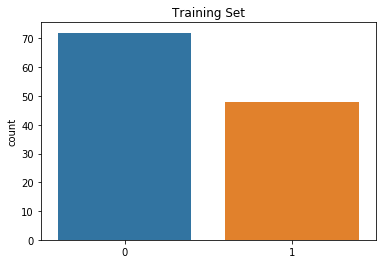

In [0]:
#Total Number of 1's and 0's in the training set
import seaborn as sns
sns.countplot(y,label="Count").set_title('Training Set')

(y == 0).astype(int).sum(axis=0)
(y == 1).astype(int).sum(axis=0)

print(f'Number of Zeroes in training label: {(y == 0).astype(int).sum(axis=0)}')
print(f'Number of Ones in training label: {(y == 1).astype(int).sum(axis=0)}')
print(f'Diagnosis column in training set is unbalanced')

In [0]:
X.isnull().any()
X.isnull().sum()

f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    3
f22    0
f23    0
f24    0
f25    0
f26    0
f27    0
f28    0
f29    0
f30    0
dtype: int64

In [0]:
## Print the number of features with missing entries

# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(X)
print(missing_values)

Selected dataframe has 30 columns.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
f21               3                2.5


In [0]:
#Taking care of Missing Data of training set
#Fill the missing entries with mean value
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X.iloc[:,])
X.iloc[:,]=imputer.transform(X.iloc[:,])

In [0]:
#Normalization
#Feature Scaling of training and testing data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X.iloc[:,]=sc_X.fit_transform(X.iloc[:,])

In [0]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,-0.012045,-0.828471,-0.078207,-0.128934,-1.192851,-0.889448,-0.804495,-0.510419,-0.800921,-1.091524,...,-0.268057,-0.979162,-0.302190,-0.329204,-1.286308,-1.021517,-1.012625,-0.437518,-1.230951,-1.088071
1,1.624442,-1.114886,1.630477,1.641820,0.323186,0.485555,1.283885,1.329571,-0.016141,-0.657108,...,1.163573,-1.377066,1.179701,1.039790,0.179959,-0.372122,0.593109,0.642487,-0.879757,-0.495318
2,-0.306978,-0.819791,-0.285081,-0.359479,-1.301559,-0.175246,0.264042,-0.335835,-1.360968,-0.581049,...,-0.457565,-0.921888,-0.419581,-0.473349,-1.464847,-0.204272,0.280910,-0.174843,-1.441975,-0.832722
3,-0.993416,-1.574886,-0.973285,-0.859547,0.298213,-0.539223,-0.823831,-0.672228,-0.048246,0.346289,...,-0.930397,-1.530802,-0.922418,-0.784042,0.046270,-0.623582,-0.900548,-0.641851,0.002850,-0.468375
4,-0.236508,0.230398,-0.285832,-0.302804,-1.656329,-0.944098,-0.838333,-0.840662,-0.358591,-0.649795,...,-0.344986,0.399939,-0.335198,-0.391930,-0.924053,-0.626096,-0.944189,-0.978058,-0.382232,-0.647793


###Explanation: 

The total number of features in the dataset are 30. We can see based on the merged dataset the the label is moderately imbalanced. There are 72 benign cases (0) and 48 malignant cases (1). 

Also, there is once column with missing values. The missing values have been replaced using the mean of overall column.

###1.2 Logistic Regression

Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1
and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

In [0]:
## Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

## Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score


In [0]:
#Importing the dataset
#X_train,X_test
X_train=pd.read_csv('/content/drive/My Drive/app/train_wbcd.csv')
X_test=pd.read_csv('/content/drive/My Drive/app/test_wbcd.csv')
#Removing patient_id
X_train=X_train.drop("Patient_ID",axis=1)
X_test=X_test.drop("Patient_ID",axis=1)

#Taking care of Missing Data of training set
#Fill the missing entries with mean value
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X_train.iloc[:,1:])
X_train.iloc[:,1:]=imputer.transform(X_train.iloc[:,1:])

#Taking care of Missing Data of testing set
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X_test.iloc[:,1:])
X_test.iloc[:,1:]=imputer.transform(X_test.iloc[:,1:])

#Normalization
#Feature Scaling of training and testing data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train.iloc[:,1:]=sc_X.fit_transform(X_train.iloc[:,1:])
X_test.iloc[:,1:]=sc_X.transform(X_test.iloc[:,1:])

In [0]:
#y_train,y_test
y_train=pd.DataFrame(X_train.iloc[:,0])
y_test=pd.DataFrame(X_test.iloc[:,0])

#Encoding Categorical Data (Diagnosis)
#Malignant(M)-1
#Benign(B)-0
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)
y_test=labelencoder_y.fit_transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#L1 Regularization
alpha_val=0.1
classifier1= LogisticRegression(C=1/alpha_val,penalty='l1',random_state=0)
classifier1.fit(X_train.iloc[:,1:],y_train)

#Predicting the test set results
y_pred_l1=classifier1.predict(X_test.iloc[:,1:])
y_pred_l1=pd.DataFrame(y_pred_l1)

#Performance of our training data
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_l1))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_l1))

#Precision
from sklearn.metrics import precision_score
print("Precision Score:")
print(precision_score(y_test,y_pred_l1))

#Recall
from sklearn.metrics import recall_score
print("Recall Score:")
print(recall_score(y_test,y_pred_l1))

#F-1 score
from sklearn.metrics import f1_score
print("f1 Score:")
print(f1_score(y_test,y_pred_l2))

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred_l1))

Confusion Matrix:
[[14  0]
 [ 1  5]]
Accuracy Score:
0.95
Precision Score:
1.0
Recall Score:
0.8333333333333334
f1 Score:
0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [0]:
#L2 Regularization
from sklearn.linear_model import LogisticRegression
lambda_val=0.1
classifier2= LogisticRegression(C=1/lambda_val,penalty='l2',random_state=0)
classifier2.fit(X_train.iloc[:,1:],y_train)

#Predicting the test set results
y_pred_l2=classifier.predict(X_test.iloc[:,1:])
y_pred_l2=pd.DataFrame(y_pred_l2)

#Performance of our training data
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_l2))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_l2))

#Precision
from sklearn.metrics import precision_score
print("Precision Score:")
print(precision_score(y_test,y_pred_l2))

#Recall
from sklearn.metrics import recall_score
print("Recall Score:")
print(recall_score(y_test,y_pred_l2))

#F-1 score
from sklearn.metrics import f1_score
print("f1 Score:")
print(f1_score(y_test,y_pred_l2))

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred_l2))

Confusion Matrix:
[[14  0]
 [ 1  5]]
Accuracy Score:
0.95
Precision Score:
1.0
Recall Score:
0.8333333333333334
f1 Score:
0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [0]:
## using alpha = .1

alpha_val = 0.5

## Train logistic regression using Elastic Net (Both L1 and L2 together)

classifier3 = SGDClassifier(loss='log', penalty='elasticnet', alpha = alpha_val, l1_ratio=0.5, max_iter=1000,random_state=0)
classifier3.fit(X_train.iloc[:,1:],y_train)

#Predicting the test set results
y_pred_l3=classifier.predict(X_test.iloc[:,1:])
y_pred_l3=pd.DataFrame(y_pred_l3)

#Performance of our training data
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_l3))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_l3))

#Precision
from sklearn.metrics import precision_score
print("Precision Score:")
print(precision_score(y_test,y_pred_l3))

#Recall
from sklearn.metrics import recall_score
print("Recall Score:")
print(recall_score(y_test,y_pred_l3))

#F-1 score
from sklearn.metrics import f1_score
print("f1 Score:")
print(f1_score(y_test,y_pred_l3))

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred_l3))


Confusion Matrix:
[[14  0]
 [ 1  5]]
Accuracy Score:
0.95
Precision Score:
1.0
Recall Score:
0.8333333333333334
f1 Score:
0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



**Explanation**

We can see from the performance matrix above that Elastic Net performs best when it comes to accuracy, however it is not as precise as the L1 and L2 model.

###1.3 Choosing the best hyper-parameter:


To choose the best hyperparameter (alpha/lambda) value, you have to do the following was done:

• For each value of hyperparameter, performed 100 random splits of training data into training and validation
data.

• Found the average validation accuracy for each 100 train/validate pairs.

The best hyperparameter was chosen with the maximum validation accuracy. Using the best alpha and lambda parameter, a new models were re-trained. 

Also evaluated the prediction performance on the test data and report the following:

• Precision

• Accuracy

• The top 5 features selected in decreasing order of feature weights.

• Confusion matrix

Finally, it was explained whether we have build underfit or overfit models.

In [0]:
#1.3 Hyperparameter Tuning
#Best value of alpha
#L1 Model
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.1,1,3,10,33,100,333,1000,3333,10000,33333]}]
grid_search=GridSearchCV(estimator=classifier1,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10)
grid_search.fit(X_train.iloc[:,1:],y_train)
best_accuracy= grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

1.0
{'C': 33}


In [0]:
#Best value of lambda
#L2 Model
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,33]}]
grid_search=GridSearchCV(estimator=classifier2,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10)
grid_search.fit(X_train.iloc[:,1:],y_train)
best_accuracy= grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

1.0
{'C': 3}


In [0]:
#1.3 
#Re-Train model with Alpha=1
#Logistic Regression Models
#L1 Regularization
alpha_val=33
classifier1= LogisticRegression(C=1/alpha_val,penalty='l1',random_state=0)
classifier1.fit(X_train.iloc[:,1:],y_train)

#Predicting the test set results
y_pred_l1=classifier1.predict(X_test.iloc[:,1:])
y_pred_l1=pd.DataFrame(y_pred_l1)
print(classifier1.coef_)
print('\n')
print(classifier1.intercept_)

#Performance of our training data
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_l1))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_l1))

#Precision
from sklearn.metrics import precision_score
print("Precision Score:")
print(precision_score(y_test,y_pred_l1))

#Recall
from sklearn.metrics import recall_score
print("Recall Score:")
print(recall_score(y_test,y_pred_l1))

#F-1 score
from sklearn.metrics import f1_score
print("f1 Score:")
print(f1_score(y_test,y_pred_l2))

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred_l1))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.27471817 0.         0.        ]]


[0.]
Confusion Matrix:
[[14  0]
 [ 1  5]]
Accuracy Score:
0.95
Precision Score:
1.0
Recall Score:
0.8333333333333334
f1 Score:
0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [0]:
#Re-Train model with Lambda=1
#Logistic Regression Models
#L2 Regularization
from sklearn.linear_model import LogisticRegression
lambda_val=3
classifier2= LogisticRegression(C=1/lambda_val,penalty='l2',random_state=0)
classifier2.fit(X_train.iloc[:,1:],y_train)

#Predicting the test set results
y_pred_l2=classifier.predict(X_test.iloc[:,1:])
y_pred_l2=pd.DataFrame(y_pred_l2)
print(classifier2.coef_)
print('\n')
print(classifier2.intercept_)

#Performance of our training data
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_l2))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_l2))

#Precision
from sklearn.metrics import precision_score
print("Precision Score:")
print(precision_score(y_test,y_pred_l2))

#Recall
from sklearn.metrics import recall_score
print("Recall Score:")
print(recall_score(y_test,y_pred_l2))

#F-1 score
from sklearn.metrics import f1_score
print("f1 Score:")
print(f1_score(y_test,y_pred_l2))

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred_l2))

[[ 0.37743065  0.53907772  0.37668186  0.36002526  0.07570476  0.10009627
   0.33332417  0.37879212  0.12661697 -0.21215823  0.24418852  0.04048929
   0.22610686  0.28189845 -0.03186669 -0.15915038 -0.09710701 -0.01818867
  -0.21511658 -0.10898513  0.42729335  0.69537222  0.43055565  0.39849811
   0.40970225  0.26032052  0.39212078  0.41040213  0.39586109  0.32452514]]


[-0.08404126]
Confusion Matrix:
[[14  0]
 [ 1  5]]
Accuracy Score:
0.95
Precision Score:
1.0
Recall Score:
0.8333333333333334
f1 Score:
0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



**Explanation:**

Based on the above two model accuracies with best alpha/ lambda values, we can see that L1 regularized model with alpha 333 gives us the best accuracy of 95% which is higher than the average validation accuracy score of 85%. Also, there is no sign of underfitting/ overfitting since the accuracy was tested on an unseen test data and still maintains a moderately high accuracy.

However, it should be noted that since it is apparently a cancer classification dataset, precision might be a more important performance indicator than accuracy, but alarmingly, we have a relatively low precision (83.33%). We need to evaluate building better models in this case.

#End